# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing data

In [2]:
path = r'/Users/puchater/Documents/CareerFoundry/Data Immersion/4. Python/17042023 Instacart Bascet Analysis'

In [3]:
ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [4]:
departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled2.csv'), index_col = False)

In [5]:
# 2. Consider any security implications that might exist for this new data. 
# You’ll need to address any PII data in the data before continuing your analysis.
# This data set contains no PII data only customer_id

# Creating the region flag

In [6]:
ords_prods_customers.loc[(ords_prods_customers['STATE'] == 'Maine') 
                    | (ords_prods_customers['STATE'] == 'New Hampshire')
                    | (ords_prods_customers['STATE'] == 'Vermont')
                    | (ords_prods_customers['STATE'] == 'Massachusetts')
                    | (ords_prods_customers['STATE'] == 'Rhode Island') 
                    | (ords_prods_customers['STATE'] == 'Connecticut') 
                    | (ords_prods_customers['STATE'] == 'New York')
                    | (ords_prods_customers['STATE'] == 'Pennsylvania') 
                    | (ords_prods_customers['STATE'] == 'New Jersey')         
                     , 'region_flag'] = 'Northeast'

In [7]:
ords_prods_customers.loc[(ords_prods_customers['STATE'] == 'Michigan') 
                    | (ords_prods_customers['STATE'] == 'Illinois')
                    | (ords_prods_customers['STATE'] == 'Indiana')
                    | (ords_prods_customers['STATE'] == 'Ohio')
                    | (ords_prods_customers['STATE'] == 'North Dakota') 
                    | (ords_prods_customers['STATE'] == 'South Dakota')  
                    | (ords_prods_customers['STATE'] == 'Wisconsin')
                    | (ords_prods_customers['STATE'] == 'Nebraska')
                    | (ords_prods_customers['STATE'] == 'Ohio')
                    | (ords_prods_customers['STATE'] == 'Kansas') 
                    | (ords_prods_customers['STATE'] == 'Minnesota')    
                    | (ords_prods_customers['STATE'] == 'Iowa') 
                    | (ords_prods_customers['STATE'] == 'Missouri')                   
                     , 'region_flag'] = 'Midwest'

In [8]:
ords_prods_customers.loc[(ords_prods_customers['STATE'] == 'Delaware') 
                    | (ords_prods_customers['STATE'] == 'Maryland')
                    | (ords_prods_customers['STATE'] == 'District of Columbia')
                    | (ords_prods_customers['STATE'] == 'Virginia')
                    | (ords_prods_customers['STATE'] == 'West Virginia') 
                    | (ords_prods_customers['STATE'] == 'North Carolina')  
                    | (ords_prods_customers['STATE'] == 'South Carolina')
                    | (ords_prods_customers['STATE'] == 'Georgia')
                    | (ords_prods_customers['STATE'] == 'Florida')
                    | (ords_prods_customers['STATE'] == 'Kentucky') 
                    | (ords_prods_customers['STATE'] == 'Tennessee')    
                    | (ords_prods_customers['STATE'] == 'Mississippi') 
                    | (ords_prods_customers['STATE'] == 'Alabama') 
                    | (ords_prods_customers['STATE'] == 'Oklahoma') 
                    | (ords_prods_customers['STATE'] == 'Texas')    
                    | (ords_prods_customers['STATE'] == 'Arkansas') 
                    | (ords_prods_customers['STATE'] == 'Louisiana')    
                     , 'region_flag'] = 'South'

In [9]:
ords_prods_customers.loc[(ords_prods_customers['STATE'] == 'Idaho') 
                    | (ords_prods_customers['STATE'] == 'Montana')
                    | (ords_prods_customers['STATE'] == 'Wyoming')
                    | (ords_prods_customers['STATE'] == 'Nevada')
                    | (ords_prods_customers['STATE'] == 'Utah') 
                    | (ords_prods_customers['STATE'] == 'Colorado')  
                    | (ords_prods_customers['STATE'] == 'Arizona')
                    | (ords_prods_customers['STATE'] == 'New Mexico')
                    | (ords_prods_customers['STATE'] == 'Alaska')
                    | (ords_prods_customers['STATE'] == 'Washington') 
                    | (ords_prods_customers['STATE'] == 'Oregon')    
                    | (ords_prods_customers['STATE'] == 'Mississippi') 
                    | (ords_prods_customers['STATE'] == 'California') 
                    | (ords_prods_customers['STATE'] == 'Hawaii')     
                     , 'region_flag'] = 'West'

In [10]:
ords_prods_customers['region_flag'].value_counts(dropna=False)

South        10157914
West          8924580
Midwest       7596325
Northeast     5722095
Name: region_flag, dtype: int64

# Spending habits between the different U.S. regions

In [11]:
ords_prods_customers.groupby('region_flag').agg({'avg_order': ['mean', 'min', 'max']})

avg_order                
                 mean  min        max
region_flag                          
Midwest      7.792550  1.0  23.200000
Northeast    7.782387  1.1  18.233333
South        7.794971  1.0  17.700000
West         7.790543  1.0  20.114286

In [12]:
crosstab = pd.crosstab(ords_prods_customers['region_flag'], ords_prods_customers['cost_flag'], dropna = False)

In [13]:
crosstab.to_clipboard()

In [14]:
crosstab

cost_flag,High spender,Low spender
region_flag,,
Midwest,29267,7567058
Northeast,18639,5703456
South,38109,10119805
West,33706,8890874


# Creating flag for low-activity customers

In [15]:
df_low_activity_customers = ords_prods_customers[ords_prods_customers['max_order']<5]

In [16]:
df_low_activity_customers.shape

(1440105, 32)

In [17]:
df_low_activity_customers.head(16)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,order_frequency,order_frequency_flag,Gender,STATE,Age,date_joined,Children,Family_status,income,region_flag
1510,520620,120,1,3,11,NaN,True,196,2,0.0,...,19.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South
1511,3273029,120,3,2,8,19.0,False,196,2,1.0,...,19.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South
1512,520620,120,1,3,11,NaN,True,46149,1,0.0,...,19.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South
1513,3273029,120,3,2,8,19.0,False,46149,1,1.0,...,19.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South
1514,520620,120,1,3,11,NaN,True,26348,3,0.0,...,19.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South
1515,906054,120,2,4,7,15.0,False,31102,1,0.0,...,19.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South
1516,3273029,120,3,2,8,19.0,False,31102,3,1.0,...,19.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South
3855,3226575,360,1,5,12,NaN,True,196,1,0.0,...,4.0,Frequent customer,Male,Arizona,46,9/1/2017,1,married,104257,West
3856,3046940,360,2,2,8,4.0,False,5322,3,0.0,...,4.0,Frequent customer,Male,Arizona,46,9/1/2017,1,married,104257,West
3857,2300993,360,3,1,13,6.0,False,5322,2,1.0,...,4.0,Frequent customer,Male,Arizona,46,9/1/2017,1,married,104257,West


In [18]:
df_low_activity_customers['max_order']

1510        3
1511        3
1512        3
1513        3
1514        3
           ..
32400883    3
32400910    4
32400911    4
32400912    4
32400913    4
Name: max_order, Length: 1440105, dtype: int64

In [19]:
# exporting low_activity_customers
df_low_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_customers.pkl'))

In [20]:
# excluding low-activity customers from the data set
df_normal_activity_customers = ords_prods_customers[ords_prods_customers['max_order']>=5]

In [21]:
# exporting normal_activity_customers
df_low_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'normal_activity_customers.pkl'))

# Consumer profiling

In [22]:
df_normal_activity_customers.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_order,order_frequency,Age,Children,income
count,3.096081e+07,3.096081e+07,3.096081e+07,3.096081e+07,3.096081e+07,2.929972e+07,3.096081e+07,3.096081e+07,3.096081e+07,3.096081e+07,3.096081e+07,3.096081e+07,3.096081e+07,3.096081e+07,3.096081e+07,3.096081e+07,3.096081e+07,3.096081e+07
mean,1.710318e+06,1.029276e+05,1.783436e+01,2.741389e+00,1.341098e+01,1.081019e+01,2.559916e+04,8.363157e+00,6.060952e-01,7.118489e+01,9.921537e+00,7.790558e+00,3.442607e+01,7.790558e+00,9.957017e+00,4.946800e+01,1.501810e+00,9.965489e+04
std,9.873785e+05,5.947075e+04,1.763448e+01,2.089264e+00,4.248865e+00,8.578530e+00,1.408183e+04,7.135498e+00,4.886142e-01,3.822292e+01,6.282406e+00,4.240526e+00,2.489496e+01,7.216593e-01,6.666089e+00,1.848525e+01,1.118899e+00,4.309125e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.554130e+05,5.140900e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.400000e+01,7.385092e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.728600e+04
50%,1.710405e+06,1.025850e+05,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,2.530100e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.812069e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.676100e+04
75%,2.565203e+06,1.543860e+05,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.800000e+01,8.224066e+00,1.250000e+01,6.500000e+01,3.000000e+00,1.280810e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.011429e+01,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


# Age Profile

In [23]:
# Creating Age Profile
df_normal_activity_customers.loc[df_normal_activity_customers['Age'] < 40, 'age_flag'] = '18-40 y.o.'

/var/folders/h2/_kwm8tsx60g1sw4xhnb42h500000gn/T/ipykernel_24193/297621253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_activity_customers.loc[df_normal_activity_customers['Age'] < 40, 'age_flag'] = '18-40 y.o.'


In [24]:
df_normal_activity_customers.loc[(df_normal_activity_customers['Age'] >= 40) & (df_normal_activity_customers['Age'] <= 60), 'age_flag'] = '40-60 y.o.'

In [25]:
df_normal_activity_customers.loc[df_normal_activity_customers['Age'] > 60, 'age_flag'] = '60+ y.o.'

In [26]:
df_normal_activity_customers['age_flag'].value_counts(dropna = False)

18-40 y.o.    10663820
40-60 y.o.    10185654
60+ y.o.      10111335
Name: age_flag, dtype: int64

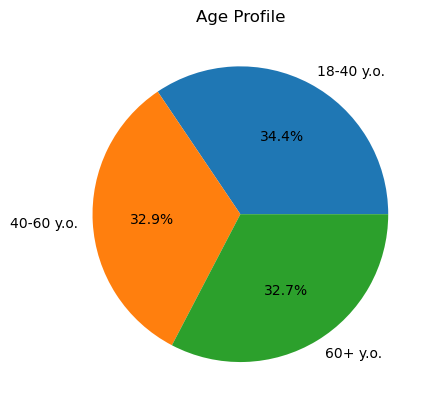

In [27]:
# Creating Age Profile Pie chart
Age_profile_pie = df_normal_activity_customers['age_flag'].value_counts().sort_index().plot.pie(title ='Age Profile', label = '', autopct=('%1.1f%%'))

In [28]:
# Age Profile expediture
df_normal_activity_customers.groupby('age_flag').agg({'avg_order': ['mean', 'min', 'max']})

avg_order                   
                mean     min        max
age_flag                               
18-40 y.o.  7.784786  1.0000  15.000000
40-60 y.o.  7.791079  1.0000  20.114286
60+ y.o.    7.796122  1.2625  19.400000

In [29]:
# Age Profile order frquency
df_normal_activity_customers.groupby('age_flag').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                      mean  min   max
age_flag                             
18-40 y.o.        9.948950  0.0  30.0
40-60 y.o.        9.980694  0.0  30.0
60+ y.o.          9.941673  0.0  30.0

In [30]:
# Age profile regional distribution
crosstab2 = pd.crosstab(df_normal_activity_customers['region_flag'], df_normal_activity_customers['age_flag'], dropna = False)

In [31]:
crosstab2.to_clipboard()

In [32]:
crosstab2

age_flag,18-40 y.o.,40-60 y.o.,60+ y.o.
region_flag,,,
Midwest,2482666,2421423,2356467
Northeast,1871565,1783729,1808782
South,3396037,3141626,3168936
West,2913552,2838876,2777150


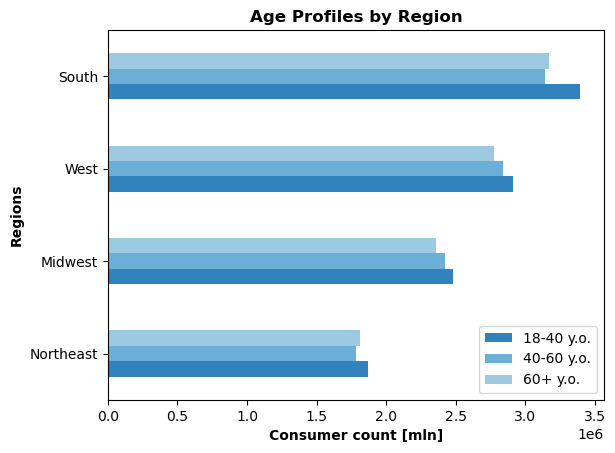

In [33]:
# Creating Age Profiles by Region stacked bar chart
Age_by_region = crosstab2.sort_values(by = ['18-40 y.o.']).plot(kind = 'barh', color = sns.color_palette('tab20c', 3))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.xlabel('Consumer count [mln]', fontweight = 'bold')
plt.title('Age Profiles by Region', fontweight = 'bold')
plt.show()

In [34]:
# The age group 18-40 y.o. is the biggest consumer group in all regions. 
# Hovewer, the 60+ y.o. group is second biggest consumer group in South and Northeast, 
# while in West and Midwest 40-60 y.o. group is the second biggest consumer group. 

In [35]:
# Departments by Age Profiles
departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [36]:
departments.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [37]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [38]:
df_norm_act_cust_dep = df_normal_activity_customers.merge(departments, on = 'department_id')

In [39]:
df_norm_act_cust_dep.shape

(30960809, 34)

In [40]:
df_norm_act_cust_dep.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,Gender,STATE,Age,date_joined,Children,Family_status,income,region_flag,age_flag,department
0,2539329,1,1,2,8,NaN,True,196,1,0.0,...,Female,Alabama,31,2/17/2019,3,married,40423,South,18-40 y.o.,beverages
1,2398795,1,2,3,7,15.0,False,196,1,1.0,...,Female,Alabama,31,2/17/2019,3,married,40423,South,18-40 y.o.,beverages
2,473747,1,3,3,12,21.0,False,196,1,1.0,...,Female,Alabama,31,2/17/2019,3,married,40423,South,18-40 y.o.,beverages
3,2254736,1,4,4,7,29.0,False,196,1,1.0,...,Female,Alabama,31,2/17/2019,3,married,40423,South,18-40 y.o.,beverages
4,431534,1,5,4,15,28.0,False,196,1,1.0,...,Female,Alabama,31,2/17/2019,3,married,40423,South,18-40 y.o.,beverages


In [41]:
crosstab5 = pd.crosstab(df_norm_act_cust_dep['department'], df_norm_act_cust_dep['age_flag'], dropna = False)

In [42]:
crosstab5.to_clipboard()

In [43]:
crosstab5

age_flag,18-40 y.o.,40-60 y.o.,60+ y.o.
department,,,
alcohol,51662,47351,45661
babies,141456,135917,133019
bakery,386002,368809,366017
beverages,874173,853041,844687
breakfast,232293,221756,217823
bulk,11624,10898,10929
canned goods,349716,332873,329485
dairy eggs,1791633,1694331,1686341
deli,345845,329022,328967


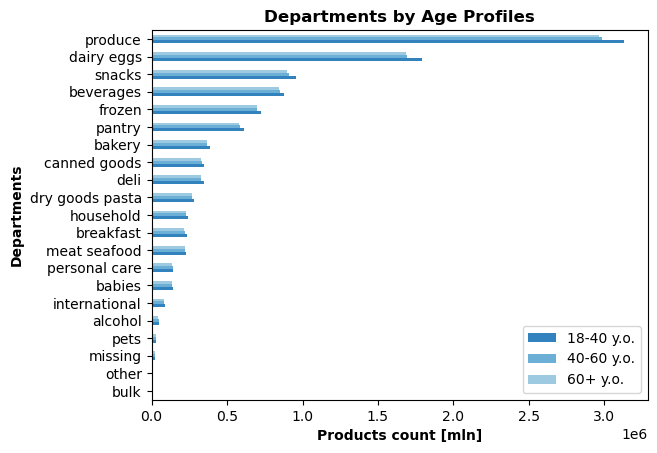

In [44]:
# Creating Departments by Age profiles stacked bar chart
departments_by_age = crosstab5.sort_values(by = ['18-40 y.o.']).plot(kind = 'barh', color = sns.color_palette('tab20c', 3))
plt.legend(loc='lower right')
plt.ylabel('Departments', fontweight = 'bold')
plt.xlabel('Products count [mln]', fontweight = 'bold')
plt.title('Departments by Age Profiles', fontweight = 'bold')
plt.show()

In [45]:
# The 18-40 y.o. group is the biggest consumer group purchasing items in all departments. 
# The biggest department sellers for all age group are produce, dairy eggs and snacks.

# Income Profile

In [46]:
# Creating Income Profile
df_norm_act_cust_dep.loc[df_norm_act_cust_dep['income'] < 70000, 'income_flag'] = '<70000'

In [47]:
df_norm_act_cust_dep.loc[(df_norm_act_cust_dep['income'] >= 70000) & (df_norm_act_cust_dep['income'] <= 140000), 'income_flag'] = '70000-140000'

In [48]:
df_norm_act_cust_dep.loc[df_norm_act_cust_dep['income'] > 140000, 'income_flag'] = '>140000'

In [49]:
df_norm_act_cust_dep['income_flag'].value_counts(dropna = False)

70000-140000    16802869
<70000           8520873
>140000          5637067
Name: income_flag, dtype: int64

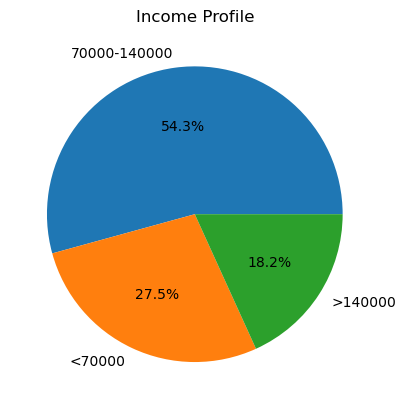

In [50]:
#Creating Income Profile Pie chart
Income_profile_pie = df_norm_act_cust_dep['income_flag'].value_counts().sort_index().plot.pie(title ='Income Profile', label = '', autopct=('%1.1f%%'))

In [51]:
# Income Profile expediture
df_norm_act_cust_dep.groupby('income_flag').agg({'avg_order': ['mean', 'min', 'max']})

avg_order                     
                  mean       min        max
income_flag                                
70000-140000  7.957109  5.283607  19.400000
<70000        7.358203  1.000000  14.423077
>140000       7.947647  4.370588  20.114286

In [52]:
# Income Profile order frequency
df_norm_act_cust_dep.groupby('income_flag').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                        mean  min   max
income_flag                            
70000-140000        9.898238  0.0  30.0
<70000             10.150829  0.0  30.0
>140000             9.839261  0.0  30.0

In [53]:
# Income profile regional distribution
crosstab3 = pd.crosstab(df_norm_act_cust_dep['region_flag'], df_norm_act_cust_dep['income_flag'], dropna = False)

In [54]:
crosstab3.to_clipboard()

In [55]:
crosstab3

income_flag,70000-140000,<70000,>140000
region_flag,,,
Midwest,3947032,1974350,1339174
Northeast,2974586,1486851,1002639
South,5289443,2678965,1738191
West,4591808,2380707,1557063


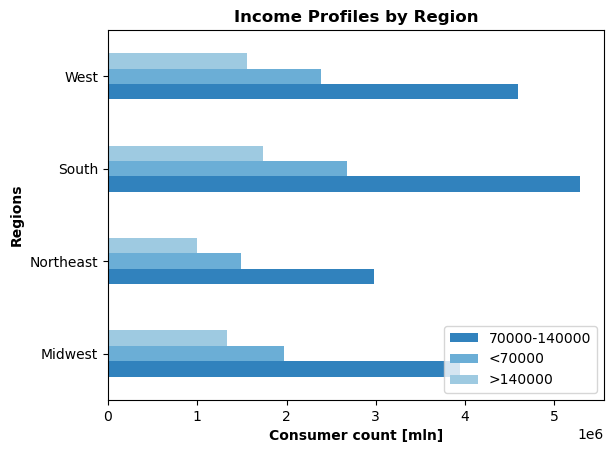

In [56]:
# Creating Income Profiles by Region stacked bar chart
Income_by_region = crosstab3.plot(kind = 'barh', color = sns.color_palette('tab20c', 3))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.xlabel('Consumer count [mln]', fontweight = 'bold')
plt.title('Income Profiles by Region', fontweight = 'bold')
plt.show()

In [57]:
# The income profile 70K-140K is the biggast consumer group in all regions followed by <70K and >140K.

In [58]:
# Departments by Income Profiles
crosstab6 = pd.crosstab(df_norm_act_cust_dep['department'], df_norm_act_cust_dep['income_flag'], dropna = False)

In [59]:
crosstab6

income_flag,70000-140000,<70000,>140000
department,,,
alcohol,73019,39965,31690
babies,237070,95171,78151
bakery,615173,292666,212989
beverages,1317508,804236,450157
breakfast,347726,204513,119633
bulk,17701,10267,5483
canned goods,569698,248530,193846
dairy eggs,2855241,1363801,953263
deli,546691,273839,183304


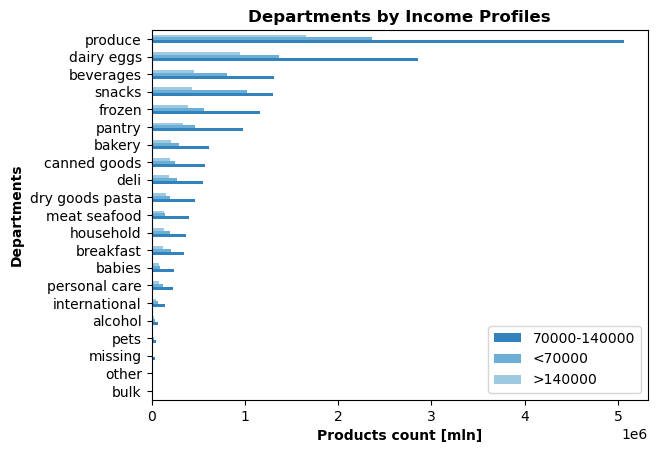

In [60]:
# Creating Departments by Income profiles stacked bar chart
Income_by_department = crosstab6.sort_values(by = ['70000-140000']).plot(kind = 'barh', color = sns.color_palette('tab20c', 3))
plt.legend(loc='lower right')
plt.ylabel('Departments', fontweight = 'bold')
plt.xlabel('Products count [mln]', fontweight = 'bold')
plt.title('Departments by Income Profiles', fontweight = 'bold')
plt.show()

In [61]:
# The produce department followed by dairy eggs department sell most goods for all income profile customers.
# Hovewer, the third biggest department varies between income profile groups. For 70K-140K and > 140K the beverages are the trid biggest department, 
# while for <70K snacs are the third biggest seller.

# Family Status Profile

In [62]:
# Creating Family Status Profile
df_norm_act_cust_dep.loc[df_norm_act_cust_dep['Children'] < 1, 'dependents_flag'] = 'Single_Adult'

In [63]:
df_norm_act_cust_dep.loc[(df_norm_act_cust_dep['Children'] >= 1) & (df_norm_act_cust_dep['Children'] <= 3), 'dependents_flag'] = 'Mature_Parent'

In [64]:
df_norm_act_cust_dep['dependents_flag'].value_counts(dropna = False)

Mature_Parent    23221966
Single_Adult      7738843
Name: dependents_flag, dtype: int64

In [65]:
# Creating a Young parent profile
df_norm_act_cust_dep.loc[(df_norm_act_cust_dep['Children'] >= 1) & (df_norm_act_cust_dep['Age'] > 40), 'dependents_flag'] = 'Young_Parent'

In [66]:
df_norm_act_cust_dep['dependents_flag'].value_counts(dropna = False)

Young_Parent     14854862
Mature_Parent     8367104
Single_Adult      7738843
Name: dependents_flag, dtype: int64

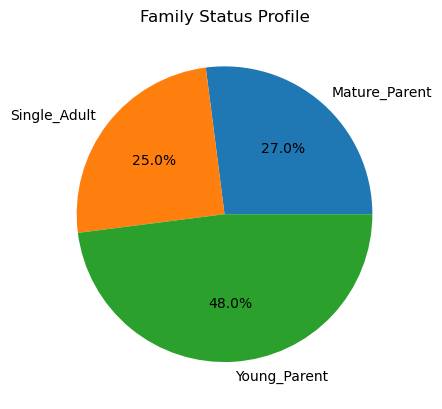

In [67]:
#Creating Family Status Pie Chart
Family_profile_pie = df_norm_act_cust_dep['dependents_flag'].value_counts().sort_index().plot.pie(title ='Family Status Profile', label = '', autopct=('%1.1f%%'))

In [68]:
# Family Status Profile expediture
df_norm_act_cust_dep.groupby('dependents_flag').agg({'avg_order': ['mean', 'min', 'max']})

avg_order                   
                     mean     min        max
dependents_flag                             
Mature_Parent    7.787406  1.0000  18.233333
Single_Adult     7.789521  1.0000  16.931250
Young_Parent     7.792875  1.2625  20.114286

In [69]:
# Family Status Profile order frequency
df_norm_act_cust_dep.groupby('dependents_flag').agg({'order_frequency': ['mean', 'min', 'max']})

order_frequency           
                           mean  min   max
dependents_flag                           
Mature_Parent          9.919355  0.0  30.0
Single_Adult           9.936475  0.0  30.0
Young_Parent           9.988932  0.0  30.0

In [70]:
# Family Status profile regional distribution
crosstab4 = pd.crosstab(df_norm_act_cust_dep['region_flag'],df_norm_act_cust_dep ['dependents_flag'], dropna = False)

In [71]:
crosstab4.to_clipboard()

In [72]:
crosstab4

dependents_flag,Mature_Parent,Single_Adult,Young_Parent
region_flag,,,
Midwest,1944383,1822605,3493568
Northeast,1464049,1354345,2645682
South,2662775,2436196,4607628
West,2295897,2125697,4107984


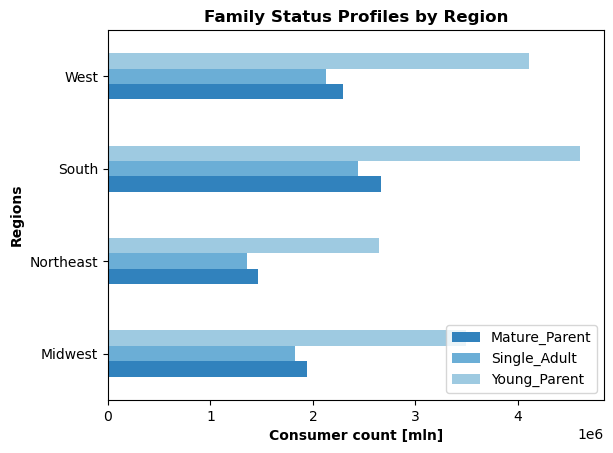

In [73]:
# Creating Family Status Profiles by Region stacked bar chart
Family_by_region = crosstab4.plot(kind = 'barh', color = sns.color_palette('tab20c', 3))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.xlabel('Consumer count [mln]', fontweight = 'bold')
plt.title('Family Status Profiles by Region', fontweight = 'bold')
plt.show()

In [74]:
# The young parents are the biggest consumer group across all the regions. Mature parents are on a second place 
# and single adults are the samllest consumer group in all regions. 

In [75]:
# Departments by Family Status Profiles
crosstab7 = pd.crosstab(df_norm_act_cust_dep['department'], df_norm_act_cust_dep['dependents_flag'], dropna = False)

In [76]:
crosstab7

dependents_flag,Mature_Parent,Single_Adult,Young_Parent
department,,,
alcohol,40712,36852,67110
babies,110077,103328,196987
bakery,301383,281395,538050
beverages,683344,645341,1243216
breakfast,182717,166720,322435
bulk,9247,8000,16204
canned goods,274329,251020,486725
dairy eggs,1405064,1293203,2474038
deli,270451,253382,480001


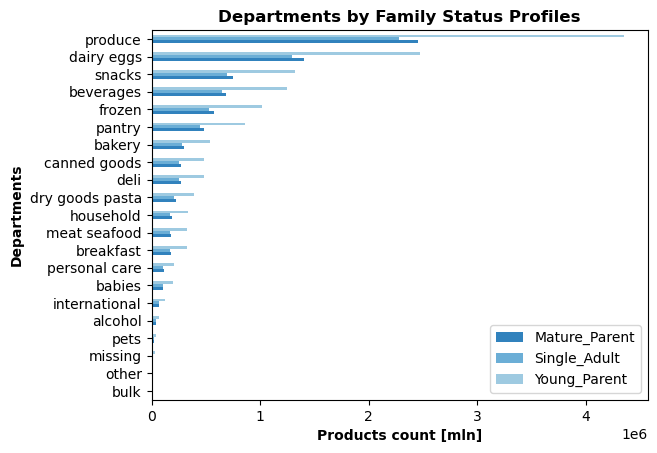

In [77]:
# Creating Departments by Family Status profiles stacked bar chart
Family_by_department = crosstab7.sort_values(by = ['Young_Parent']).plot(kind = 'barh', color = sns.color_palette('tab20c', 3))
plt.legend(loc='lower right')
plt.ylabel('Departments', fontweight = 'bold')
plt.xlabel('Products count [mln]', fontweight = 'bold')
plt.title('Departments by Family Status Profiles', fontweight = 'bold')
plt.show()

In [78]:
# Produce, diry eggs, and snacs are the 3 biggest department across all family status profiles.

# Data export

In [79]:
# Exporting the plots
Age_profile_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_profile_pie_dow.png'))

In [80]:
Age_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_profile_by_region_bar_dow.png'))

In [81]:
departments_by_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_profile_by_department_bar_dow.png'))

In [82]:
Income_profile_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_profile_pie_dow.png'))

In [83]:
Income_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_profile_by_region_bar_dow.png'))

In [84]:
Income_by_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_profile_by_department_bar_dow.png'))

In [85]:
Family_profile_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_profile_pie_dow.png'))

In [86]:
Family_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_profile_by_region_bar_dow.png'))

In [87]:
Family_by_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_profile_by_department_bar_dow.png'))

In [88]:
# Exporting data
df_norm_act_cust_dep.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'complete_data.pkl'))